In [5]:
import numpy as np
import torch

from codebase import utils as ut
from codebase.models.vae import VAE
from codebase.models.gmvae import GMVAE
from codebase.train import train
from pprint import pprint
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# VAE plot

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Device: {device}')
#train_loader, labeled_subset, _ = ut.get_mnist_data(device, use_test_subset=True)
z = 10
iter_max = 20000
layout = [
    ('model={:s}',  'vae'),
    ('z={:02d}',  z),
    ('run={:04d}', 0)
]
model_name = '_'.join([t.format(v) for (t, v) in layout])
vae = VAE(z_dim=10, name=model_name).to(device)

Device: cpu


Loaded from checkpoints\model=vae_z=10_run=0000\model-20000.pt


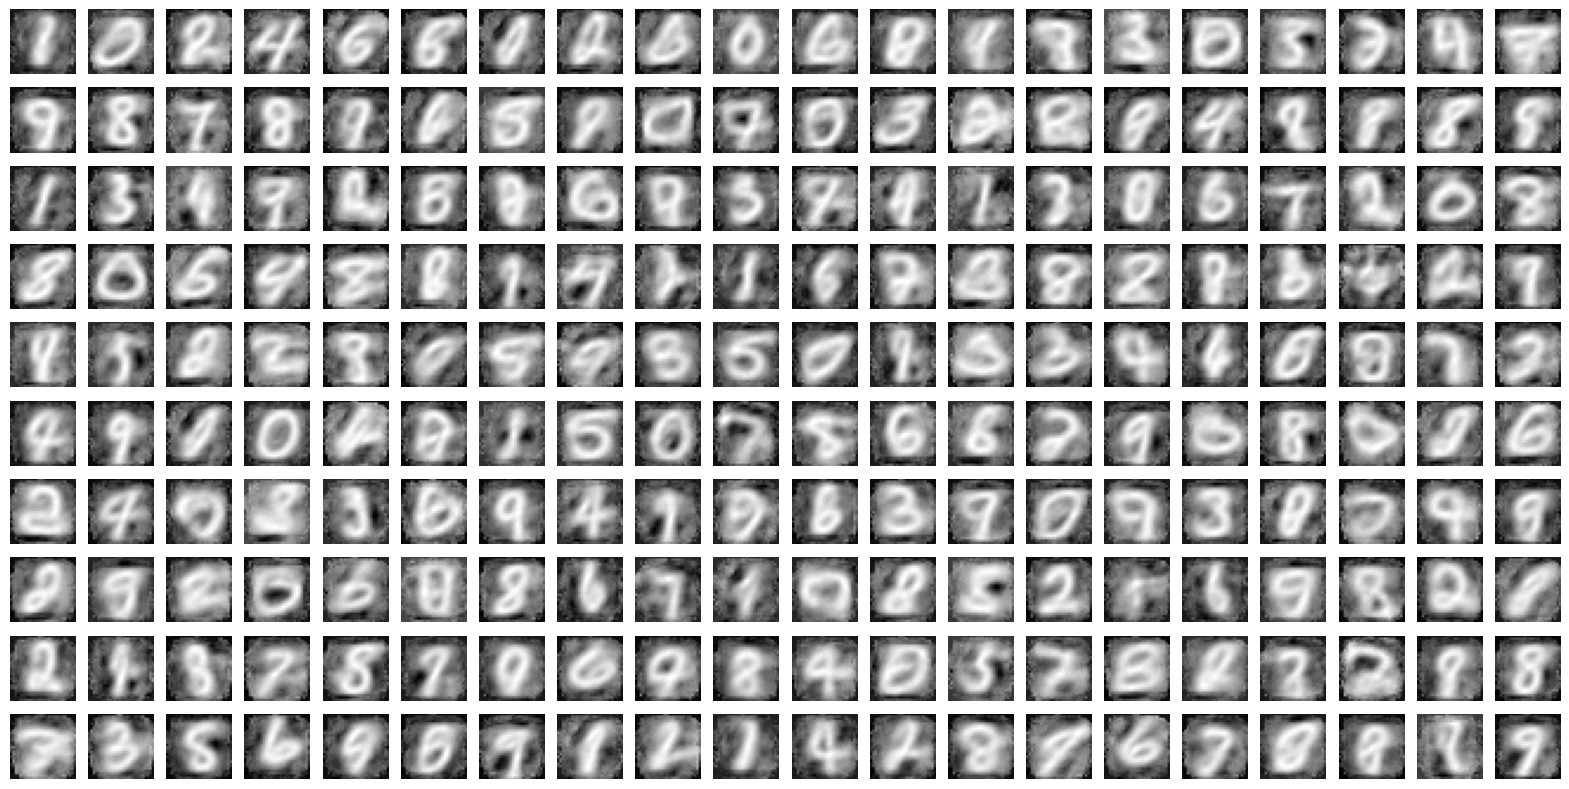

In [8]:
ut.load_model_by_name(vae, global_step=20000, device=device)

images = vae.dec(vae.sample_z(200)).view(200, 28, 28).detach().cpu().numpy()
images = images.reshape(10, 20, 28, 28)

fig, ax = plt.subplots(10, 20, figsize=(20, 10))

for i in range(10):
    for j in range(20):
        ax[i, j].imshow(images[i, j], cmap='gray')
        ax[i, j].axis('off')

plt.show()

# GMVAE plot

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Device: {device}')
#train_loader, labeled_subset, _ = ut.get_mnist_data(device, use_test_subset=True)
z_dim = 10
k=500
iter_max = 20000
layout = [
    ('model={:s}',  'gmvae'),
    ('z={:02d}',  z_dim),
    ('k={:03d}',  k),
    ('run={:04d}', 0)
]
model_name = '_'.join([t.format(v) for (t, v) in layout])
gmvae = GMVAE(z_dim=z_dim, k=k, name=model_name).to(device)

Device: cpu


Loaded from checkpoints\model=gmvae_z=10_k=500_run=0000\model-40000.pt


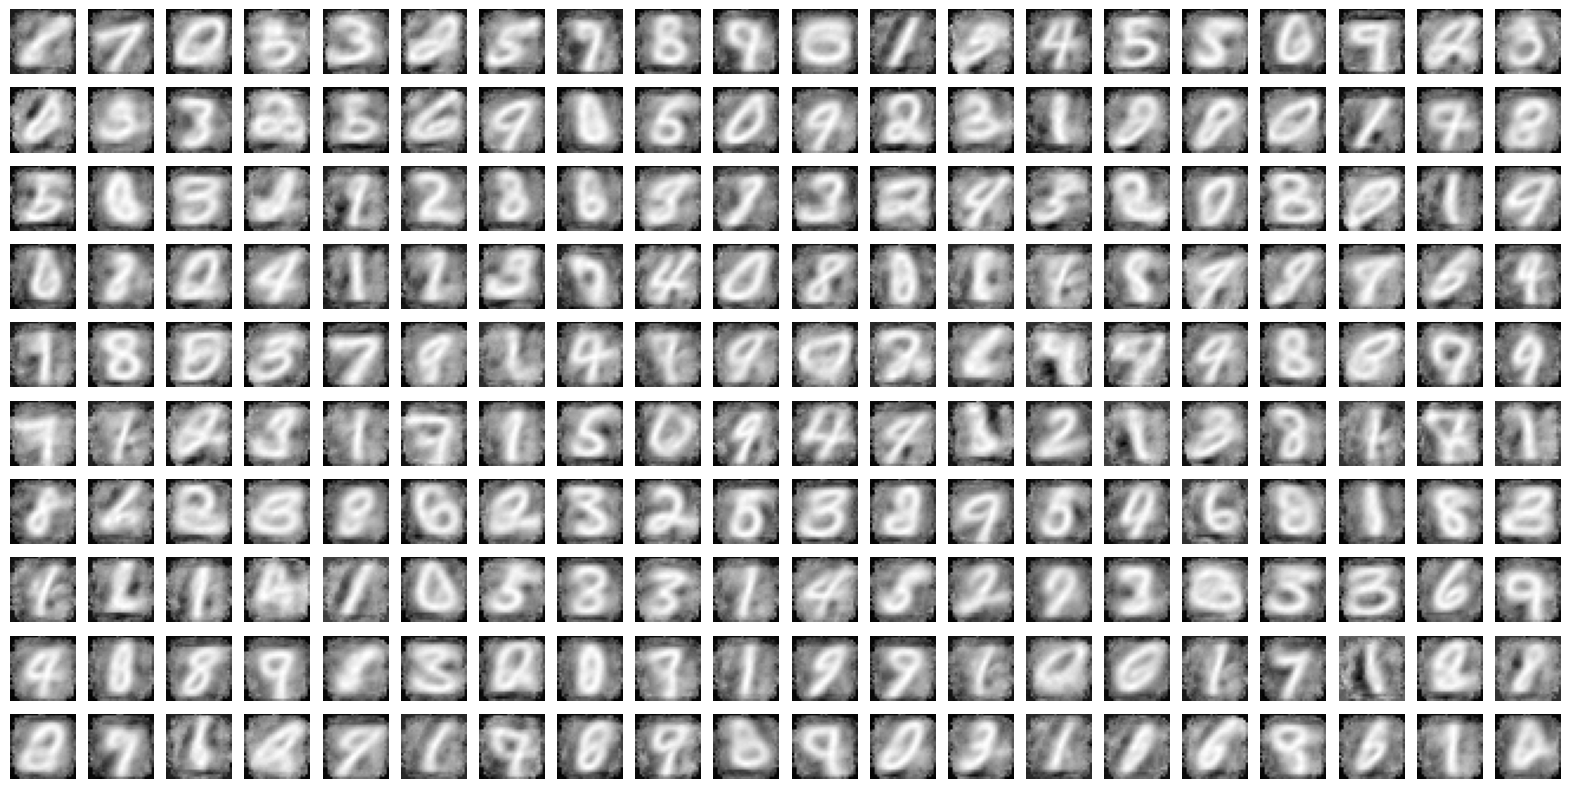

In [8]:
ut.load_model_by_name(gmvae, global_step=40000, device=device)

images = gmvae.dec(gmvae.sample_z(200)).view(200, 28, 28).detach().cpu().numpy()
images = images.reshape(10, 20, 28, 28)

fig, ax = plt.subplots(10, 20, figsize=(20, 10))

for i in range(10):
    for j in range(20):
        ax[i, j].imshow(images[i, j], cmap='gray')
        ax[i, j].axis('off')

plt.show()